# Experiment 4: Non Linear Regression

In [119]:
import pickle

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [120]:
df = pd.read_csv("../../data/energy/df.csv", )
df.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
0,1054,32658,-16.064,-76.599,112.441,0.000,0.955,-0.296,35,28449.0,13.415,1,1
1,1054,32671,-16.208,-76.707,112.611,-0.719,0.415,0.558,24,28450.0,13.415,1,1
2,1053,32639,-16.064,-76.624,122.011,0.000,0.830,0.558,12,28450.0,13.415,1,1
3,1054,32670,-16.064,-76.624,112.611,0.000,0.830,0.558,54,28450.0,13.415,1,1
4,1054,32664,-15.968,-76.625,112.559,0.478,0.827,0.296,47,28451.0,13.415,1,1


In [121]:
df.describe()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
count,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,4.899060e+05,489906.000000,489906.0,489906.000000
mean,1048.735653,32496.026419,0.341670,-1.514543,119.205209,0.000912,-0.002101,-0.182805,26.056821,4.893892e+07,37.133466,1.0,3262.098839
std,592.666757,18372.661240,50.964521,62.401296,47.553276,0.582604,0.583274,0.535609,9.273521,2.905600e+07,24.312587,0.0,1937.060856
min,1.000000,1.000000,-94.627000,-115.600000,37.700000,-0.955000,-0.955000,-1.000000,1.000000,2.844900e+04,10.002000,1.0,1.000000
25%,537.000000,16622.000000,-44.772000,-58.113000,74.211000,-0.478000,-0.478000,-0.556000,23.000000,2.393785e+07,16.872000,1.0,1595.000000
50%,1056.000000,32727.000000,1.424000,-4.581000,121.789000,0.000000,-0.000000,-0.296000,26.000000,4.810140e+07,29.505000,1.0,3206.000000
75%,1562.000000,48398.750000,40.478000,48.480000,160.241000,0.478000,0.478000,0.296000,28.000000,7.434630e+07,52.643000,1.0,4956.000000
max,2070.000000,64170.000000,96.243000,105.024000,196.611000,0.955000,0.955000,0.558000,209.000000,9.998601e+07,99.947000,1.0,6665.000000


# Define target and predictors

In [122]:
y = df['energy']

# X = df[['pos_x', 'pos_y', 'time']]
# X = df[['pos_x', 'pos_z', 'time']]
X = df[['pos_y', 'pos_z', 'time']]

# Split Dataset 

Dataset needs to be split into:
1. Main
    1. Train
    2. Test
2. Holdout for Testing on Unseen Data

In [124]:
n = 20

In [125]:
hold_X = X[-n:]
hold_y = y[-n:]

X.drop(X.tail(n).index, inplace=True)
y.drop(y.tail(n).index, inplace=True)

/Users/shrutirao/Documents/Coding/Thesis/km3net/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Train/Test Split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

print(" X TRAIN SHAPE: {} \n X TEST SHAPE: {} \n".format(X_train.shape, X_test.shape))
print(" Y TRAIN SHAPE: {} \n Y TEST SHAPE: {}".format(y_train.shape, y_test.shape))

 X TRAIN SHAPE: (342920, 3) 
 X TEST SHAPE: (146966, 3) 

 Y TRAIN SHAPE: (342920,) 
 Y TEST SHAPE: (146966,)


# Model 1: Decision Tree

In [127]:
dtree = DecisionTreeRegressor(max_depth=20,
                              min_samples_leaf=1,
                              random_state=3)

# scores = cross_val_score(dtree, X_train, y_train, cv=5)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=3)

# Model 1: Results

In [128]:
pred_train_tree = dtree.predict(X_train)
print("RMSE: ", np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print("R2: ", r2_score(y_train, pred_train_tree))

pred_test_tree = dtree.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print("R2: ", r2_score(y_test, pred_test_tree))

RMSE:  10.254214674034015
R2:  0.8220949615963379
RMSE:  10.733433530919234
R2:  0.8051472529350374


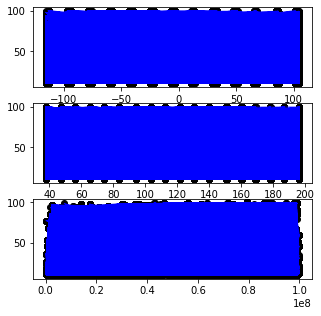

In [103]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5,5))

ax1.scatter(X_test['pos_y'], y_test,  color='black')
ax1.plot(X_test['pos_y'], pred_test_tree , color='blue', linewidth=1)

ax2.scatter(X_test['pos_z'], y_test,  color='black')
ax2.plot(X_test['pos_z'], pred_test_tree , color='blue', linewidth=1)

ax3.scatter(X_test['time'], y_test,  color='black')
ax3.plot(X_test['time'], pred_test_tree , color='blue', linewidth=1)

# Save Model

In [130]:
filename = 'dtree_model.sav'
pickle.dump(dtree, open(filename, 'wb'))

# Test on Unseen Data

In [131]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8051472529350374


In [132]:
Xnew = hold_X
ynew = loaded_model.predict(Xnew)

In [133]:
ynew

array([12.888, 12.888, 12.888, 12.888, 12.888, 12.888, 12.888, 12.888,
       12.888, 12.888, 53.298, 11.722, 12.888, 53.298, 12.888, 12.888,
       12.888, 53.298, 53.298, 53.298])

In [134]:
hold_y

489886    12.888
489887    12.888
489888    12.888
489889    12.888
489890    12.888
489891    12.888
489892    12.888
489893    12.888
489894    12.888
489895    12.888
489896    12.888
489897    12.888
489898    12.888
489899    12.888
489900    12.888
489901    12.888
489902    12.888
489903    52.453
489904    52.453
489905    52.453
Name: energy, dtype: float64

In [135]:
print("RMSE: ", np.sqrt(mean_squared_error(hold_y, ynew))) 
print("R2: ", r2_score(hold_y, ynew))

RMSE:  12.785612677928269
R2:  0.1809497201917316


# Model2: Random Forest (Bootstrap Aggregation)

In [136]:
model_rf = RandomForestRegressor(n_estimators=50,
                                 oob_score=True,
                                 random_state=100,
                                verbose=2)

model_rf.fit(X_train, y_train) 

pred_train_rf = model_rf.predict(X_train)

print("RMSE: ", np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print("R2: ", r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("R2: ", r2_score(y_test, pred_test_rf))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


RMSE:  1.2816404275818623
R2:  0.9972208253888253
RMSE:  3.3850630714917114
R2:  0.9806196007056827


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.9s finished


# Model2: Results

In [137]:
model_rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.0s finished


0.9806196007056827

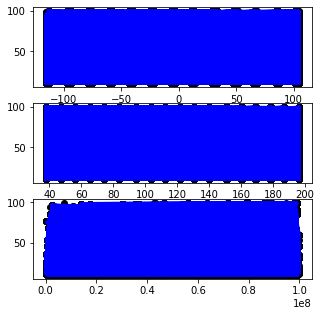

In [138]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5,5))

ax1.scatter(X_test['pos_y'], y_test,  color='black')
ax1.plot(X_test['pos_y'], pred_test_rf, color='blue', linewidth=3)

ax2.scatter(X_test['pos_z'], y_test,  color='black')
ax2.plot(X_test['pos_z'], pred_test_rf, color='blue', linewidth=3)


ax3.scatter(X_test['time'], y_test,  color='black')
ax3.plot(X_test['time'], pred_test_rf, color='blue', linewidth=3)

# Save Model

In [139]:
filename = 'rf_model.sav'
pickle.dump(model_rf, open(filename, 'wb'))

# Unseen Data

In [140]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9806196007056827


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.5s finished


In [141]:
Xnew = hold_X
ynew = loaded_model.predict(Xnew)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [142]:
ynew

array([14.5044 , 12.888  , 12.888  , 13.31872, 12.888  , 12.888  ,
       17.83898, 13.31872, 12.888  , 12.888  , 32.822  , 20.9971 ,
       12.888  , 33.70942, 21.59834, 12.888  , 14.5044 , 39.63174,
       36.23794, 37.0734 ])

In [143]:
hold_y

489886    12.888
489887    12.888
489888    12.888
489889    12.888
489890    12.888
489891    12.888
489892    12.888
489893    12.888
489894    12.888
489895    12.888
489896    12.888
489897    12.888
489898    12.888
489899    12.888
489900    12.888
489901    12.888
489902    12.888
489903    52.453
489904    52.453
489905    52.453
Name: energy, dtype: float64

In [144]:
print('Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(hold_y, ynew)))

print('Coefficient of determination: %.2f'
      % r2_score(hold_y, ynew))

Mean squared error: 9.13
Coefficient of determination: 0.58
